**Artificial Inteligence (CS550)**
<br>
Date: **29 January 2020**
<br>
Location: **SU, NEW STEM building**
<br>
Room: **304**

Title: **Workshop №2**
<br>
Speaker: **Dr. Shota Tsiskaridze**

<h3 align="center">Step by step computation of PCA</h3>

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data set;

2. Calculation of the covariance matrix;

3. Calculation of the singular values and singular vectors and factorization of the covariance matrix;

4. Calculation of the number $k$ of Principal Components corresponding to a certain proportion of total variance $\epsilon$ 

5. Reduction of the data set size;

6. Data reconstruction from a reduced data set;


Let's for each step create an appropriate $method$.

<h3 align="center">Import libraries</h3>

$\bullet$ **numPy**: fundamental package for scientific computing with Python

$\bullet$ **scipy**: a Python library used for scientific computing and technical computing. We use it here for loading matlab files (.mat extension)

$\bullet$ **matplotlib**: a Python 2D plotting library which produces publication quality figures:

In [1]:
import numpy as np
from numpy.linalg import svd
from scipy.io import loadmat      #
import matplotlib.pyplot as plt

<h3 align="center">Defining Methods</h3>

In [2]:
# Method for step 1: Standardization of the data
# Input:  matrix X
# Output: normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.

def standardization(X):

    # calculates mean value and standard deviation
    mu = np.mean(X, axis=0)     #axes along which the means are computed
    sigma = np.std(X, axis=0)   #axes along which the means are computed
    
    # normalize each element of the matrix so that they are normally distributed with N(0,1) (mu=0, sigma=1)
    X_norm = (X - mu) / sigma
    
    return X_norm

In [3]:
# Method for step 1: Calculation of the covariance matrix
# Input:  matrix X
# Output: covariance matrix of matrix X

def covariance(X):
    
    m = X.shape[0]               # n - number of vectors
    CovX = 1/(m - 1) * X.T @ X
    
    return CovX

In [4]:
# Method for step 3: Calculation of the singular values and singular vectors and factorization of the covariance matrix
# Input:  matrix X
# Output: Singular Value Decomposition of matrix X

def factorization(X):

    U,S,V = svd(X)
  
    return U,S,V

In [5]:
# Method for step 4: Calculation of the number of Principal Components corresponding to a certain proportion of total variance

# Input:  diagonal matrix of singular variables S, number of first columns k 
# Output: proportion of total variance
def epsilon(S, k):

    m = S.shape[0]               # m - number of elements in S
    
    eps1 = 0
    eps2 = 0
    for i in range(m):
        if (i<k): eps1 += S[i]
        eps2 += S[i]
    
    return eps1/eps2

# Input:  diagonal matrix of singular variables S, threshold for the proportion of total variance
# Output: optimal value of the number of Prinipal Components
def optimal_epsilon(S, eps):
    k = 1
    while epsilon(S, k) < eps:
        k += 1
    return k

In [6]:
# Method for step 5: Reduction of the data set size;
# Input:  matrix X, U, k
# Output: the reduced data set representation 

def reduction(X, U, k):

    m = X.shape[0]               # m - number of vectors
    U_reduced = U[:,:k]
    Z = np.zeros((m,k))
    
    for i in range(m):
        for j in range(k):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [7]:
# Method for step 6: Data reconstruction from a reduced data set
# Input:  matrix Z, U, k
# Output: reconstructed matrix X

def reconstruction(Z, U, k):

    m,n = Z.shape[0],U.shape[0] # m - number of vectors in Z, # n - number of vectors in U
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:k]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

<h3 align="center">Main</h3>
Let's move no the main part of the code and let's load images and display them.

In [8]:
# let's load the images (5k images in total), each image has size 32x32 (1024 features).
mat = loadmat("Data/ex7faces.mat")
X = mat["X"]
X.shape

(5000, 1024)

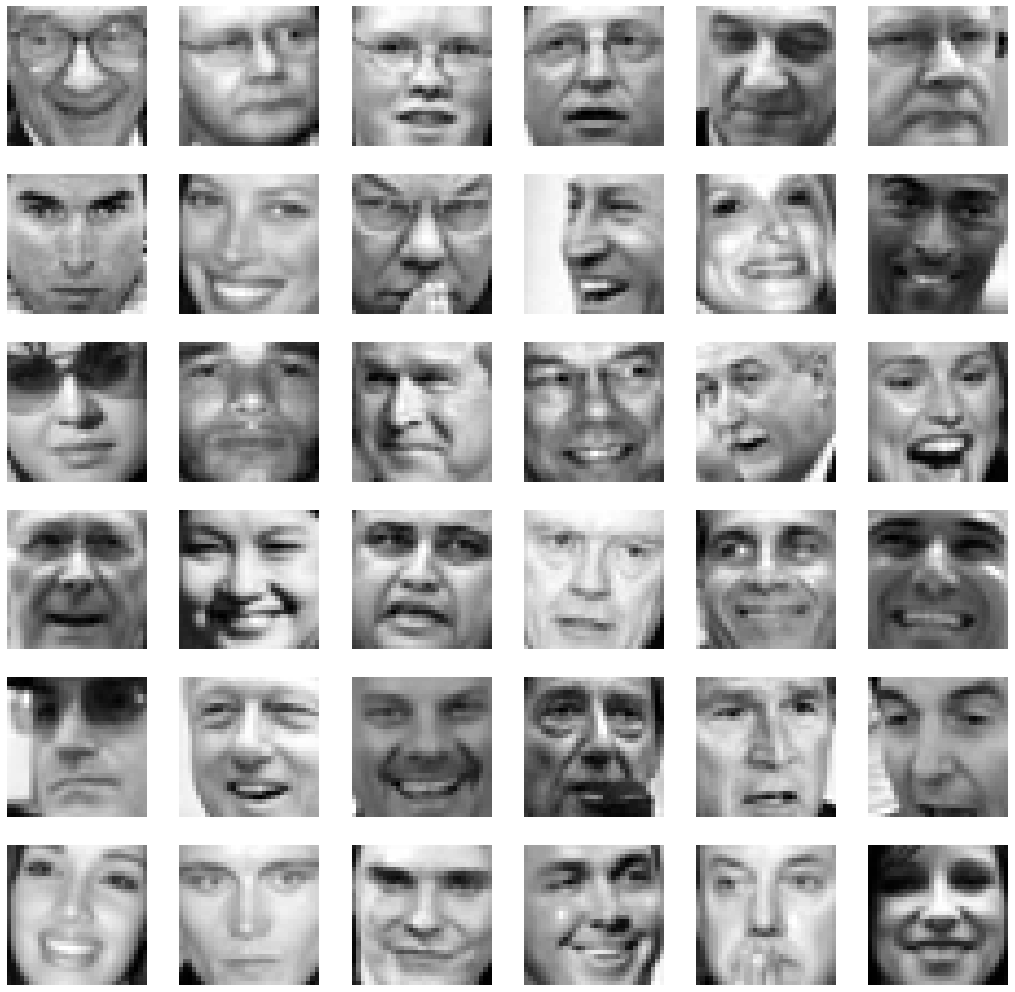

In [9]:
# to show multiple images we need to create subplots

nrows  =6    # define the number of rows
ncols  =6    # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig, ax = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = X[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax[int(i/ncols),j].axis("off")                        # tur off axis for better visibility

In [ ]:
# do the data standardization of matrix X

X_norm = # fill me
X.shape

In [ ]:
# compute the covariance matrix from X_norm

CovX = # fill me
CovX.shape

In [ ]:
# perform Singular Value Decomposition of matrix CovX

U, S, V = # fill me
U.shape, S.shape, V.shape

# note: S is known as singular values vector which in fact is a representation of diagonal matrix

<BarContainer object of 1024 artists>

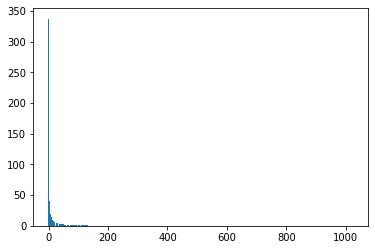

In [13]:
# show full range of singular values

plt.bar(range(S.shape[0]), S)

<BarContainer object of 50 artists>

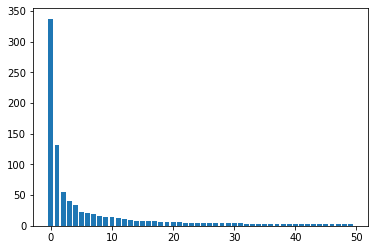

In [14]:
# show the first 100 singular values

plt.bar(range(50), S[:50])

In [ ]:
# select the number of principal components corresponding to a proportion of total variance of 90%

k = # fill me
k

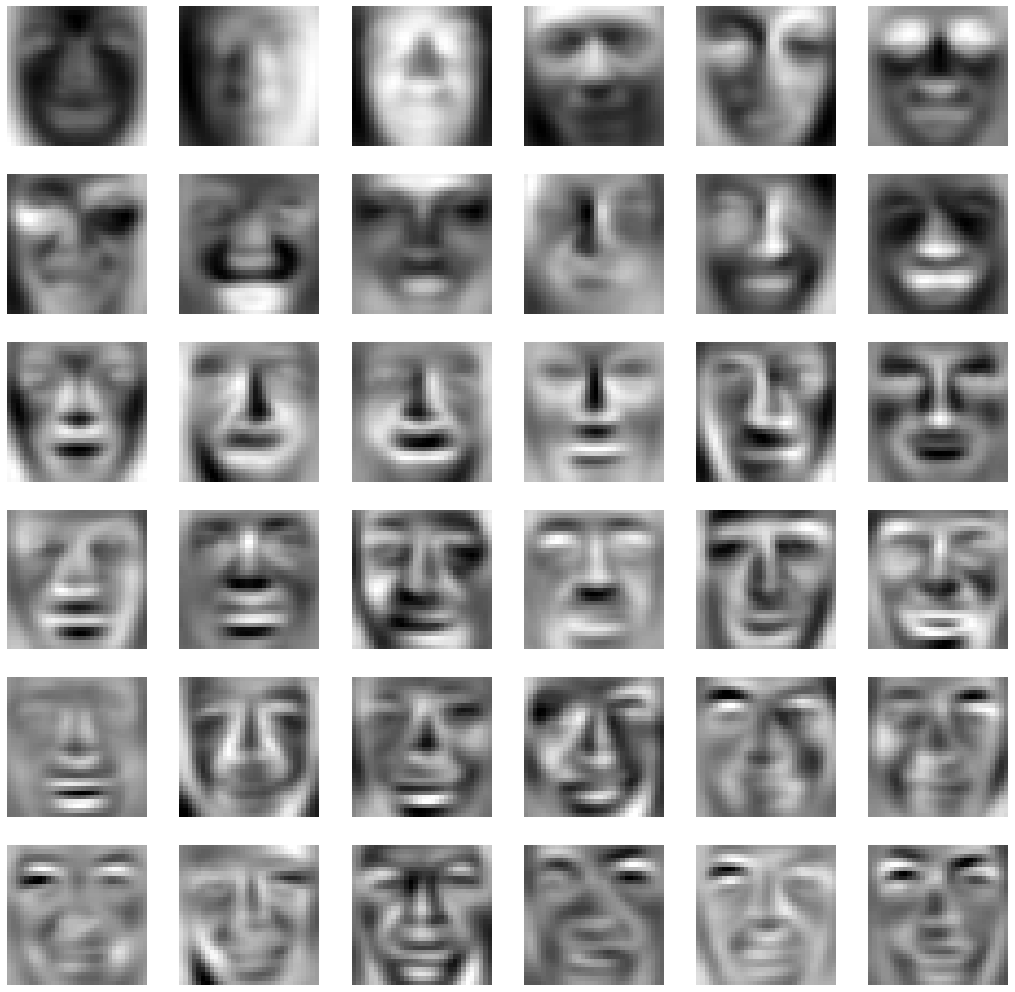

In [16]:
# visualize the images with reduced number of features

U_reduced = U[:,0:k].T

nrows  = 6   # define the number of rows
ncols  = 6   # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig2, ax2 = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = U_reduced[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax2[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax2[int(i/ncols),j].axis("off")   

In [ ]:
# reduce the data set using only first k principal components

Z = # fill me
Z.shape

In [ ]:
# reconstruct the data from the a reduced dataset

X_rec  = # fill me
X_rec.shape

### Visualize the reconstructed data

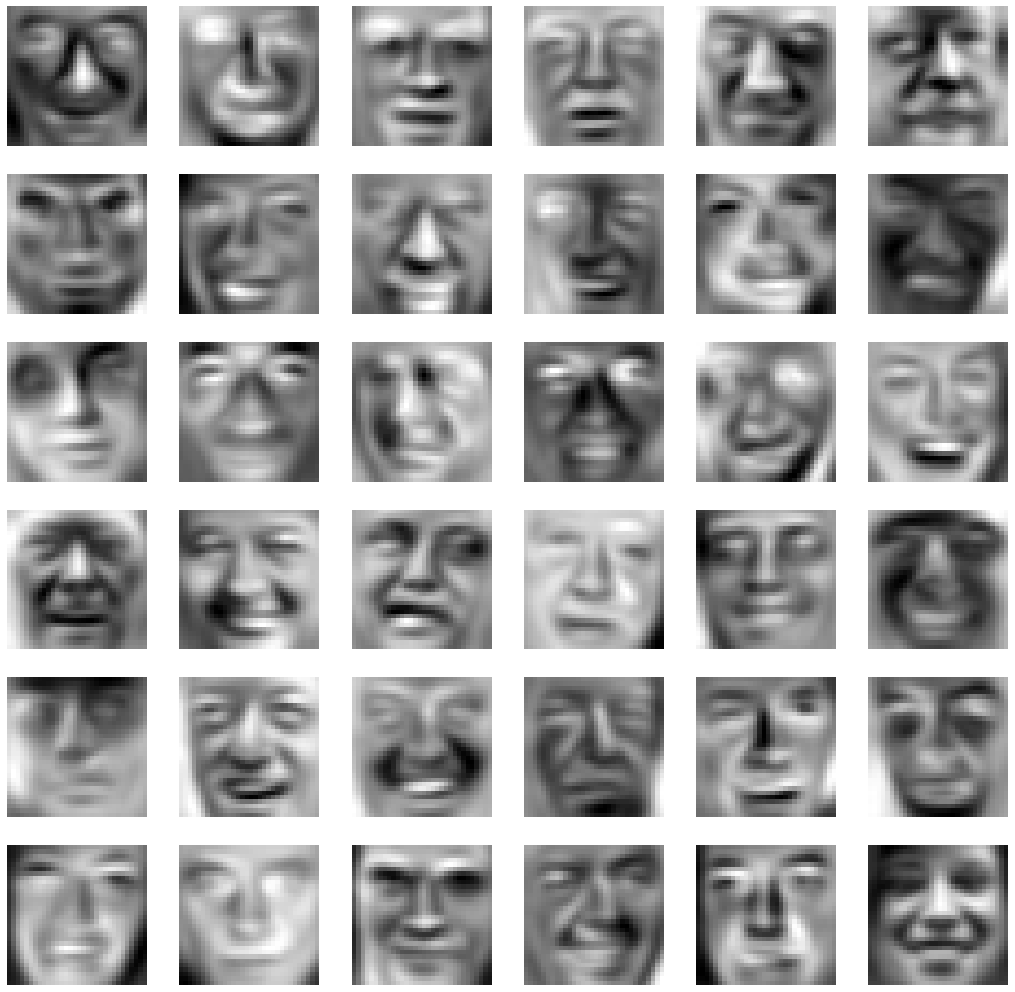

In [19]:
# visualize the reconstructed images

nrows  = 6   # define the number of rows
ncols  = 6   # define the number of columns
fsize  = 18  # define the size of subplots
nimage = 36  # define the number of images

fig3, ax3 = plt.subplots(nrows, ncols, figsize=(fsize,fsize)) 

for i in range(0, nimage, ncols):
    for j in range(nrows):
        
        reshaped_image = X_rec[i+j,:].reshape(32,32,order="F") # unflatten 1024 size vector in 32x32 to get right image matrix
        ax3[int(i/ncols),j].imshow(reshaped_image,cmap="gray") # show reshaped image in grayscale
        ax3[int(i/ncols),j].axis("off")   